# One-vs-one multiclass classification

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

import svm
import rbf_kernel
import ovo

### Generate training and test sets

In [2]:
size = 50
# blob 1
x = np.random.normal(2,1,(size))
y = np.random.normal(2,1,(size))
# blob 2
x = np.concatenate((x,np.random.normal(-3,1,(size))))
y = np.concatenate((y,np.random.normal(-2,1,(size))))
# blob 3
x = np.concatenate((x,np.random.normal(1,1,(size))))
y = np.concatenate((y,np.random.normal(-4,1,(size))))
# blob 4
x = np.concatenate((x,np.random.normal(-4,1,(size))))
y = np.concatenate((y,np.random.normal(4,1,(size))))

# add geometric xy together, add intercept 
X = np.hstack((np.ones(4*size),x,y)).reshape(3,4*size).T

# reuse y for labels
    # indexes for easy labeling
i = [0,size,2*size,3*size,4*size]
y[i[0]:i[1]] = 0
y[i[1]:i[2]] = 1
y[i[2]:i[3]] = 2
y[i[3]:i[4]] = 3

In [3]:
size = 10
# blob 1
x = np.random.normal(2,1,(size))
ty = np.random.normal(2,1,(size))
# blob 2
x = np.concatenate((x,np.random.normal(-3,1,(size))))
ty = np.concatenate((ty,np.random.normal(-2,1,(size))))
# blob 3
x = np.concatenate((x,np.random.normal(1,1,(size))))
ty = np.concatenate((ty,np.random.normal(-4,1,(size))))
# blob 4
x = np.concatenate((x,np.random.normal(-4,1,(size))))
ty = np.concatenate((ty,np.random.normal(4,1,(size))))

# add xy together, add intercept 
tX = np.hstack((np.ones(4*size),x,ty)).reshape(3,4*size).T
# reuse y for flags
    # indexes
i = [0,size,2*size,3*size,4*size]
ty[i[0]:i[1]] = 0
ty[i[1]:i[2]] = 1
ty[i[2]:i[3]] = 2
ty[i[3]:i[4]] = 3

### Fit the data

**Linear SVC**

OvO takes the estimator `class` as an argument

In [4]:
estimator = svm.SVM

In [5]:
one_vs_one = ovo.OvO()

In [6]:
one_vs_one.fit(estimator,X,y)

In [7]:
one_vs_one.predict(tX)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3.])

In [8]:
one_vs_one.score(tX,ty)

1.0

### Visualize decision boundaries

**Training set**

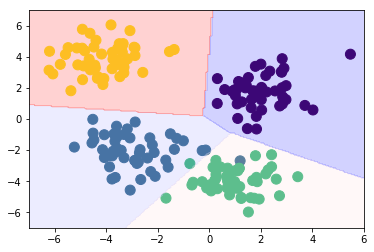

In [10]:
xxx = np.linspace(-7,6,200)
yyy = np.linspace(-7,7,200)
xx, yy = np.meshgrid(xxx,yyy)
Z = one_vs_one.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape((xx.shape))
plt.scatter(X[:,1],X[:,2],c=y,s=100)
plt.contourf(xx,yy,Z,alpha=0.2,cmap='bwr')
plt.show()

**Test set**

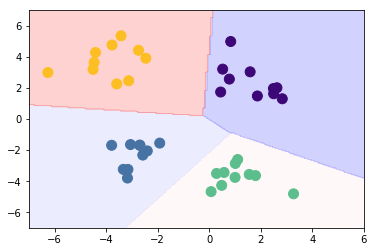

In [11]:
plt.scatter(tX[:,1],tX[:,2],c=ty,s=100)
plt.contourf(xx,yy,Z,alpha=0.2,cmap='bwr')
plt.show()

**If user is interested in the specific estimator of a pair of labels:**

In [12]:
label1 = 0
label2 = 2
one_vs_one.regressors[label1,label2]

Note: order of labels doesn't matter

**If user provides an instance of a class, a warning is given**<br>
The reason is to avoid confusion where a user thinks any parameters or fitting done on the given estimator will carry on

In [13]:
estimator = svm.SVM()
ovo.OvO().fit(estimator,X,y)

New instances of the class will be generated, but the estimator itself will be ignored


### RBF kernel

In [14]:
r = rbf_kernel.SVMrbf
kernel_ovo = ovo.OvO()

In [15]:
kernel_ovo.fit(r,X,y)

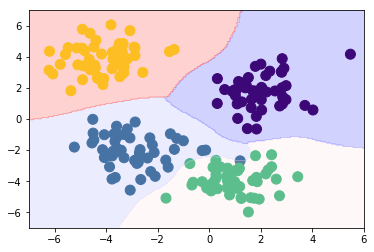

In [16]:
Z = kernel_ovo.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape((xx.shape))
plt.scatter(X[:,1],X[:,2],c=y,s=100)
plt.contourf(xx,yy,Z,alpha=0.2,cmap='bwr')
plt.show()

In [17]:
kernel_ovo.score(tX,ty)

0.975

### Options

**Arguments can be passed to the estimators for their `fit` in the form of a `dict`**

In [34]:
kernel_ovo.fit(r,X,y,{'epochs':3})

In [35]:
kernel_ovo.score(tX,ty)

0.85

**Score can take any function that evaluated the real labels with the predicted labels**
<br>
Note: the given example is for illustrative purposes only

In [36]:
def penalize_distance(real_y,pred):
    # assume that the labels are ordinal, count the absolute gap between the prediction and the real labels
    return np.abs(real_y-pred).sum()

In [37]:
kernel_ovo.score(tX,ty,penalize_distance)

6.0

**Labels can be of any type**

Internally, each estimator converts the labels to values it can work with (typically `[0,1]` or `[-1,1]`)

Example with strings:

In [38]:
# convert dtype of labels and convert labels to string
y = y.astype(object)
y[y==0] = 'Medium'
y[y==1] = 'Large'
y[y==2] = 'XL'
y[y==3] = 'Custom'

# same with test set
ty = ty.astype(object)
ty[ty==0] = 'Medium'
ty[ty==1] = 'Large'
ty[ty==2] = 'XL'
ty[ty==3] = 'Custom'

In [39]:
# train estimator again with new labels
one_vs_one.fit(estimator,X,y)

New instances of the class will be generated, but the estimator itself will be ignored


In [40]:
one_vs_one.predict(tX)

array(['Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Large', 'Large', 'Large',
       'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large',
       'XL', 'XL', 'XL', 'XL', 'XL', 'XL', 'XL', 'XL', 'XL', 'XL',
       'Custom', 'Custom', 'Custom', 'Custom', 'Custom', 'Custom',
       'Custom', 'Custom', 'Custom', 'Custom'], dtype=object)

In [41]:
one_vs_one.score(tX,ty)

1.0